<a href="https://colab.research.google.com/github/berilldindar/Garbage-Classification-with-ANN-Model-Project/blob/main/Garbage%20Classification%20with%20ANN%20Model%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import  Flatten,Dense
from keras.models import Sequential

import glob, os, random

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
base_path = '/content/gdrive/MyDrive/vizeOdev/Dataset/train'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2087


In [ ]:
test_path='/content/gdrive/MyDrive/vizeOdev/Dataset/test'
img_liste = glob.glob(os.path.join(test_path, '*/*.jpg'))
print(len(img_liste))

509


In [ ]:
batch_size = 32
epochs=20

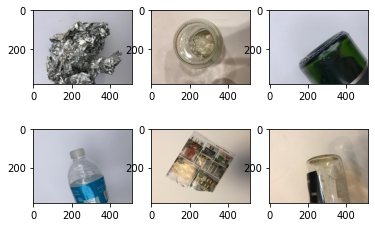

In [ ]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 1881 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
model=Sequential()
model.add(Dense(32,input_shape=(100,100,3)))
model.add(Dense(16,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100, 100, 32)      128       
_________________________________________________________________
dense_6 (Dense)              (None, 100, 100, 16)      528       
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                10240064  
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 198       
Total params: 10,242,998
Trainable params: 10,242,998
Non-trainable params: 0
__________________________________________

In [ ]:
history= model.fit(train_generator,
                    steps_per_epoch=train_generator.samples//32,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples// 32)


Epoch 1/20
58/58 [==============================] - 26s 443ms/step - loss: 5.4136 - accuracy: 0.2215 - val_loss: 1.4912 - val_accuracy: 0.3802
Epoch 2/20
58/58 [==============================] - 26s 442ms/step - loss: 1.5607 - accuracy: 0.3365 - val_loss: 1.4284 - val_accuracy: 0.3906
Epoch 3/20
58/58 [==============================] - 25s 432ms/step - loss: 1.4080 - accuracy: 0.4122 - val_loss: 1.4048 - val_accuracy: 0.3750
Epoch 4/20
58/58 [==============================] - 25s 435ms/step - loss: 1.3737 - accuracy: 0.4408 - val_loss: 1.3795 - val_accuracy: 0.4688
Epoch 5/20
58/58 [==============================] - 25s 438ms/step - loss: 1.3221 - accuracy: 0.4810 - val_loss: 1.3188 - val_accuracy: 0.4688
Epoch 6/20
58/58 [==============================] - 25s 430ms/step - loss: 1.2697 - accuracy: 0.4987 - val_loss: 1.2914 - val_accuracy: 0.4583
Epoch 7/20
58/58 [==============================] - 25s 431ms/step - loss: 1.2318 - accuracy: 0.5229 - val_loss: 1.3215 - val_accuracy: 0.4531

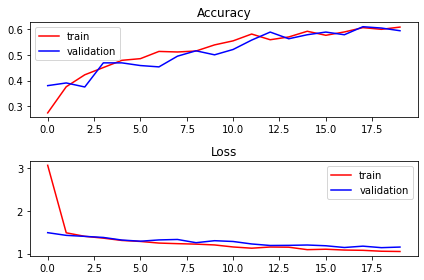

In [ ]:
plt.subplot(2,1,1)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')

plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
Y_pred = model.predict(validation_generator, train_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['cardboard',  'glass',  'metal',  'paper',  'plastic',  'trash']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 6  9  8 12  2  1]
 [10  5  3 19  0  3]
 [ 5  4  3 14  3  3]
 [ 8  8  4 17  4  6]
 [ 1  9  4 16  6  3]
 [ 3  3  0  4  0  0]]
Classification Report
              precision    recall  f1-score   support

   cardboard       0.18      0.16      0.17        38
       glass       0.13      0.12      0.13        40
       metal       0.14      0.09      0.11        32
       paper       0.21      0.36      0.26        47
     plastic       0.40      0.15      0.22        39
       trash       0.00      0.00      0.00        10

    accuracy                           0.18       206
   macro avg       0.18      0.15      0.15       206
weighted avg       0.20      0.18      0.18       206



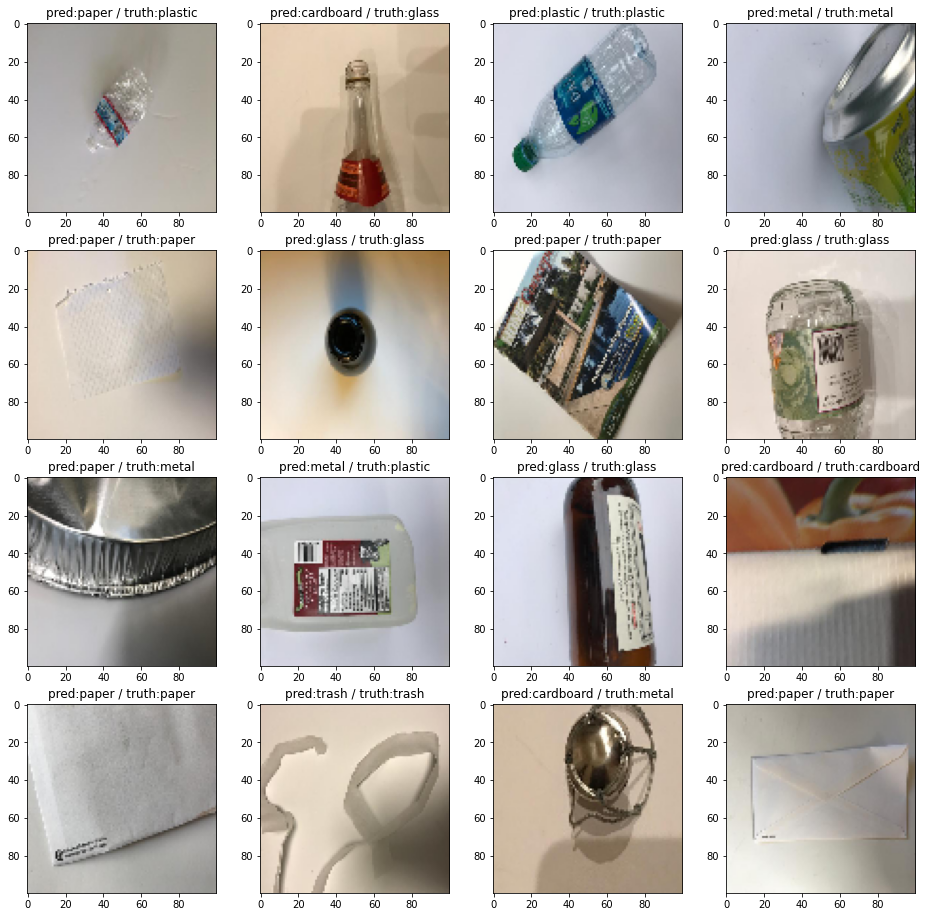

In [ ]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])